# Introduction

Hello! This notebook is part of a project analyzing how the factors of composite Mersenne numbers behave (or how they're distributed).

Here, we are doing some fairly direct analysis of k-value races as we order them lexicographically by associated Mersenne p-value and then by size. This intro is under construction, but for those who would like to do some background reading I would suggest visiting [The Great Internet Mersenne Prime Search](https://www.mersenne.org) (aka GIMPS) and reading about prime number races. An excellent (if slightly old) introduction to the idea is available [here](https://dms.umontreal.ca/~andrew/PDF/PrimeRace.pdf) (and coauthored by my MA supervisor's supervisor, a little unsurprisingly).

# The Data

The main dataset with which I'm working is fairly large, and pulled from the GIMPS sister site [mersenne.ca/export](https://www.mersenne.ca/export). In particular, I'm using the (n,k) data from exponents n less than a billion (and in this notebook so far, considerably less than a hundred thousand). I retrieved my version in June and the project is very active, so every few months the dataset is updated with richer information. What's lovely about this site is that the data it provides is generated by an active and lively distributed computing project; many factors not even very far out would be hard or impossible to find alone.

In [9]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import os
import math
import matplotlib.pyplot as plt

In [10]:
# Import the text data. Still sticking with 0G for now, it's plenty.

nkdata_raw = open('mersenneca_known_factors_0G.txt', 'r')

In [11]:
# Choices of adjustable things after file selection are here.

lines = 10000
modulus = 3

In [12]:
# Read into a list first.

nkdata_raw.seek(0) # Just in case we messed around with the file somewhere before.

i = 0
nklist = []

# I'm going to get all the pairs without the newline at the end into a list, as strings.

for line in nkdata_raw:
    nklist.append(line[:(len(line)-1)])
    i=i+1
    if i == lines: # This is where we bring in our 'lines' variable from earlier.
        break

# Now we make our k list of integers.

klist=[]

for entry in nklist:
    
    # The entries are of the form 'n,k'. All we need is a simple split to get at the k value,
    # but in another section we'll look at n values.
    
    stringk = entry.split(',')[1]
    k = int(stringk)
    klist.append(k)

In [13]:
# Now we process based on modulus.

karray = np.asarray(klist) # put it in an array

karray_modded = np.remainder(karray,modulus)

# This will have, as its entries, the accumulation arrays of each mod.

k_race=[]

for i in range(modulus):
    
    k_race.append(np.zeros_like(karray_modded)) # append the array which will be accumulation mod i
    
    s = 0 # The running sum; accumulation
    
    for index, e in np.ndenumerate(k_race[i]):
        if karray_modded[index] == i: # Checks if we're bumping up the count for this modulus
            s = s+1
        k_race[i][index] = s # These will be what get graphed

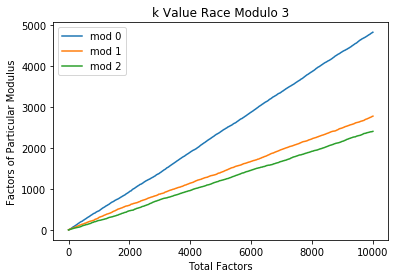

In [14]:
# The graph

x = np.arange(len(karray_modded)) + 1 # starting the x axis from 1, because I'm not a savage

for i in range(modulus):
    plt.plot(x, k_race[i], label='mod ' + str(i))

plt.xlabel('Total Factors')
plt.ylabel('Factors of Particular Modulus')

plt.title("k Value Race Modulo " + str(modulus))

plt.legend()

plt.show()

# Analysis

If we fix a particular prime exponent $n=p$ with associated Mersenne number $2^p-1$, and assume that the associated primes $q_i=2k_ip+1$ have asymptotically even distributions among residues $\text{mod } m$ for odd $m$ (a strong assumption but compatible with the classical restrictions $\text{mod } 8$), then this makes sense; after making some calculations involving the residues (like $2^p-1\equiv 1 \text{ mod }3$) then we can determine that $k\equiv\pm1$ each about a quarter of the time and $k\equiv0$ the other half.

There's still a pretty noticeable bias of higher order between the residues $\pm1$. We can show that the residues are flipped between $p$ and $k_i$ for a given $p$, so seeing the reverse of a Chebyshev-like bias would be expected here (and that is what we see). What an exciting, apparently null result! More analysis with other mods, cofactor involvement and $p$ involvement directly to come.